# MNIST

# 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# For data manipulation
import numpy as np
import pandas as pd 

# For Data Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

# Machine Learning
from sklearn import neighbors
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# 2. Loading Data

In [2]:
# Download data
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

# 3. Data Preprocessing

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [7]:
y[0]

'5'

In [8]:
# convert y to integers
y = y.astype(np.uint8)

In [9]:
y[0]

5

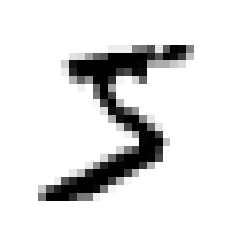

In [10]:
# plot a digit
some_digit = np.array(X.iloc[0])
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
# Create Data to classify 5 only
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Logistic Regression

In [13]:
# Models
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree Classifier'  : DecisionTreeClassifier(criterion='gini'),
    'Random Forest Classifier' : RandomForestClassifier(criterion='entropy', n_jobs=-1),
    'KNeighborsClassifier' : neighbors.KNeighborsClassifier(5, weights = 'uniform')
}

In [16]:
# Classify 5 only
for name, model in models.items():
    # Fitting
    model.fit(X_train, y_train_5)

    # Accuracy
    model_pred = model.predict(X_test)
    model_accuracy = accuracy_score(y_test_5, model_pred) * 100
    print('{} Accuracy : {:.2f}'.format(name, model_accuracy))

Logistic Regression Accuracy : 97.79
Decision Tree Classifier Accuracy : 97.66
Random Forest Classifier Accuracy : 98.91
KNeighborsClassifier Accuracy : 99.39


In [17]:
# Classify all
for name, model in models.items():
    # Fitting
    model.fit(X_train, y_train)

    # Accuracy
    model_pred = model.predict(X_test)
    model_accuracy = accuracy_score(y_test, model_pred) * 100
    print('{} Accuracy : {:.2f}'.format(name, model_accuracy))

Logistic Regression Accuracy : 92.55
Decision Tree Classifier Accuracy : 87.76
Random Forest Classifier Accuracy : 96.75
KNeighborsClassifier Accuracy : 96.88
